# Portfolio estimation

Small functions to visualize stock market data and calculate basic portfolio numbers

In [1]:
from pandas_datareader.data import DataReader
from pandas_datareader.moex import MoexReader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
start_date = "01-01-2014"
end_date = "06-01-2018"
tickers = ["AAPL", "MSFT", "NFLX"]
#platform = 'iex' 
platform = 'yahoo'
data = DataReader(tickers, platform, start_date, end_date)
try:
    #Yahoo
    tickers_data = data["Close"]
except:
    #iex
    tickers_data = data["close"]

In [3]:
def corrfunc(x, y, **kws):
    r, _ = scipy.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

def plot_adjusted_price(ticker_price):
    ticker_price = ticker_price / ticker_price.iloc[0, :]
    ax = ticker_price.plot(figsize=(16,9))
    ax.set_ylabel('Adjusted closing price ($)')
    
def plot_instruments_correlation(ticker_price):
    g = sns.PairGrid(ticker_price, height=4.5)
    g.map_upper(plt.scatter, s=1, marker=".", alpha=0.25)
    g.map_diag(sns.distplot, kde=False)
    g.map_lower(sns.kdeplot, cmap="Blues_d")
    g.map_lower(corrfunc)
    
def plot_mean_avg(ticker_price, windows=(20, 100)):
    fig, ax = plt.subplots(figsize=(16,9))
    ax.plot(ticker_price.index, ticker_price, label=ticker_price.name)
    for w in windows:
        rolling_ticker_price = ticker_price.rolling(window=w).mean()
        ax.plot(rolling_ticker_price.index, rolling_ticker_price, label='%d days rolling' % w)
        ax.set_xlabel('Date')
        ax.set_ylabel('Adjusted closing price ($)')
        ax.legend()
        
def plot_accumulated_log_return(ticker_price):
    ticker_price /= ticker_price.iloc[0, :]
    ticker_price = np.log(ticker_price)
    ax = ticker_price.plot(figsize=(16,9))
    ax.set_ylabel('Accumulated log return')

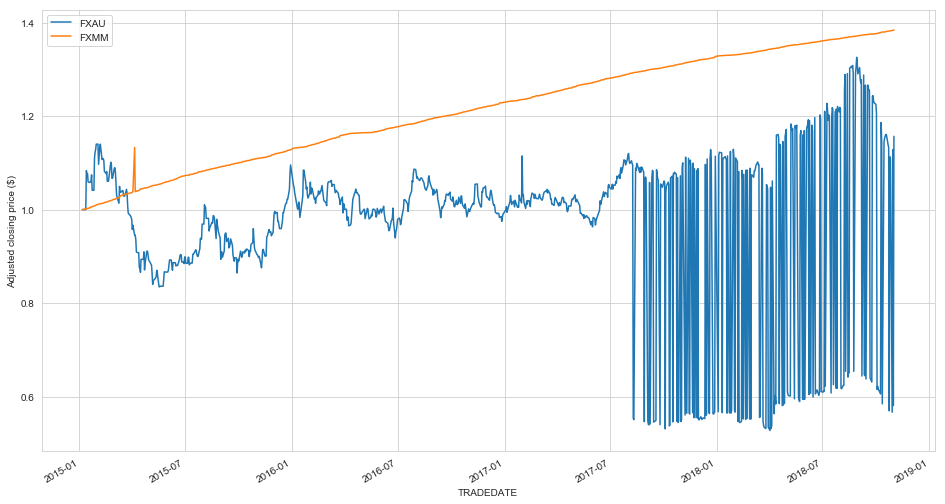

In [34]:
plot_adjusted_price(tickers_price[["FXAU", "FXMM"]])

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


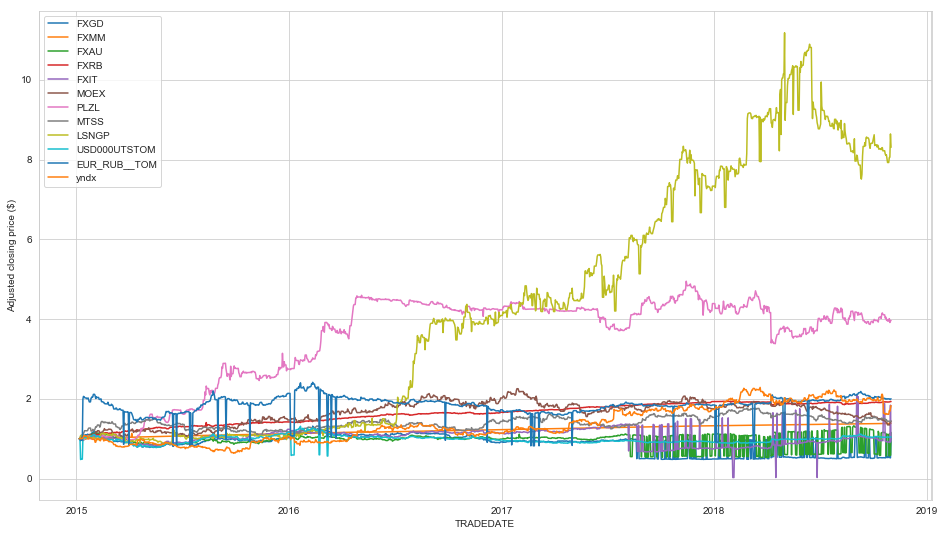

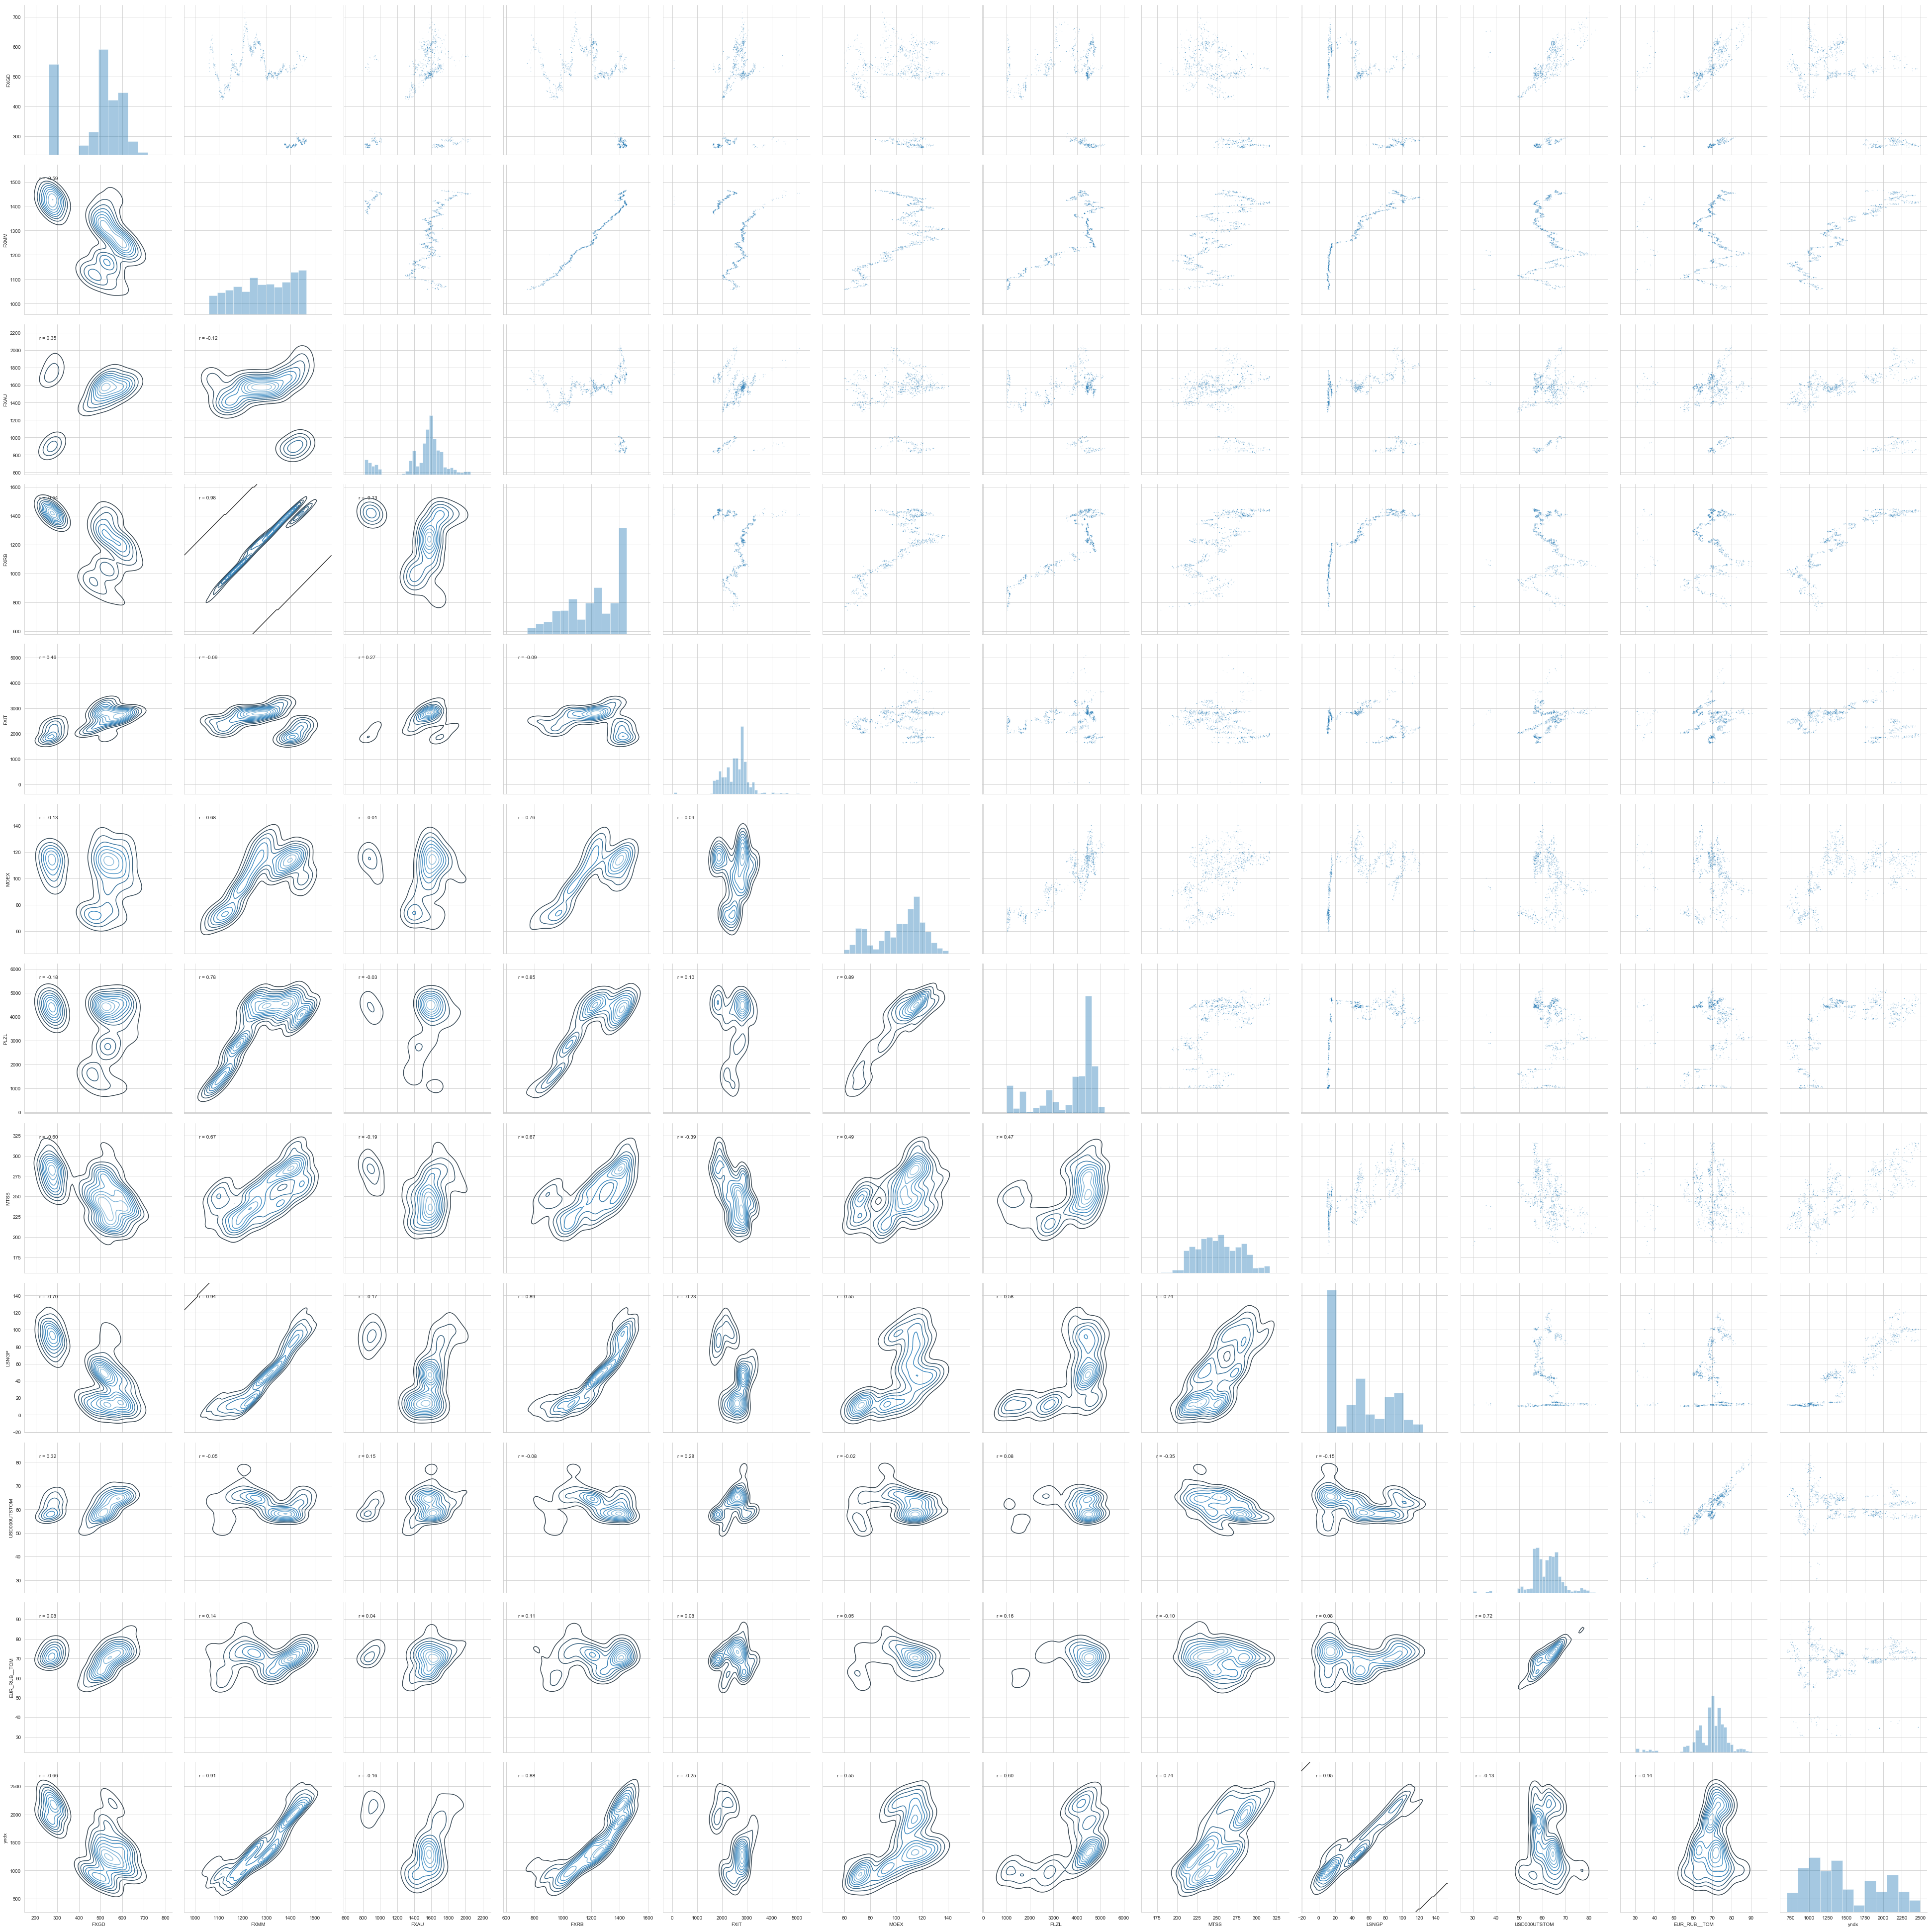

In [20]:
plot_instruments_correlation(tickers_price)

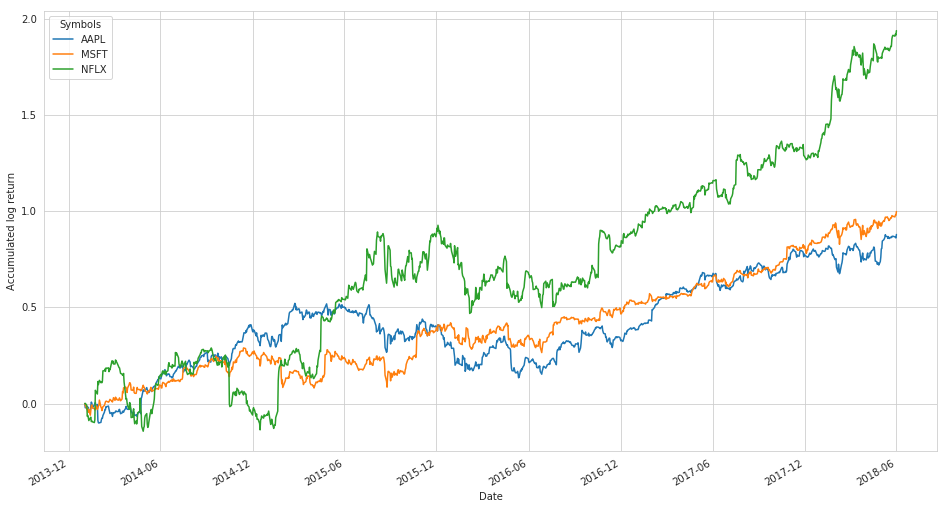

In [11]:
plot_accumulated_log_return(tickers_data)

In [12]:
log_returns = np.log(tickers_data) - np.log(tickers_data.iloc[0, :])
portfolio_weights = pd.Series(1 / 3, index=tickers_data.columns)

Text(0,0.5,'Portfolio cumulative log returns')

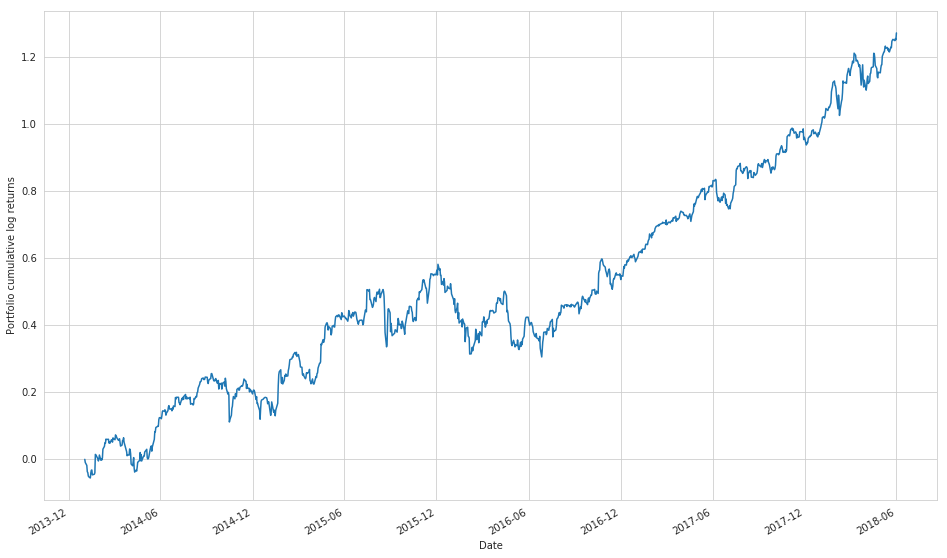

In [13]:
portfolio_log_returns = portfolio_weights.dot(log_returns.transpose())
ax = portfolio_log_returns.plot(figsize=(16,10))
ax.set_ylabel('Portfolio cumulative log returns')

In [4]:
# Calculating the time-related parameters of the simulation
total_days_in_simulation = (tickers_data.index[-1] - tickers_data.index[0]).days
number_of_years = total_days_in_simulation / 365.25

# The last data point will give us the total portfolio return
total_portfolio_return = np.exp(portfolio_log_returns[-1])
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

NameError: name 'portfolio_log_returns' is not defined

# Portfolio Return analysis

In [83]:
t= MoexReader(["FXAU"], start_date, end_date).read()

'TQTF'

In [103]:
dates = [
    ("2017-11-01", "2018-11-01"),
    ("2017-05-01", "2018-05-01"),
    ("2016-11-01", "2017-11-01"),
    ("2016-05-01", "2017-05-01"),
    ("2015-11-01", "2016-11-01"),
    ("2015-05-01", "2016-05-01"),
]
start_dates, end_dates = zip(*dates)
start_dates = list(map(pd.Timestamp, start_dates))
end_dates = list(map(pd.Timestamp, end_dates))

symbols = ["FXGD", "FXMM", "FXAU", "FXRB", "FXIT", "MOEX", "PLZL", "MTSS", "LSNGP", "USD000UTSTOM", "EUR_RUB__TOM", "yndx"]

def getMoexData(symbols, start_date, end_date):
    res = pd.DataFrame(columns=symbols, index=pd.date_range(pd.Timestamp(start_date), pd.Timestamp(end_date)))
    for s in symbols:
        t = MoexReader(s, start_date, end_date).read()
        t.index = pd.DatetimeIndex(t.index)
        t = t[~t.CLOSE.isna()]
        boardid = t.BOARDID.groupby(t.BOARDID).count().idxmax()
        t = t[t.BOARDID == boardid]
        #t = t.groupby(t.index).aggregate({"CLOSE": "max"})
        t = t.drop_duplicates()
        res[s] = t.CLOSE
    res = res.fillna(method="ffill").fillna(method="bfill")
    return res

In [ ]:
getMoexData(symbols, start_date="2015-01-01", end_date="2018-11-10")

In [153]:
tickers_price[["USD000UTSTOM", "EUR_RUB__TOM"]]

USD000UTSTOM  EUR_RUB__TOM
2015-01-01       63.2400       74.9085
2015-01-02       63.2400       74.9085
2015-01-03       63.2400       74.9085
2015-01-04       63.2400       74.9085
2015-01-05       63.2400       74.9085
2015-01-06       63.2400       74.9085
2015-01-07       63.2400       74.9085
2015-01-08       60.3010       71.6000
2015-01-09       61.5500       72.2510
2015-01-10       61.5500       72.2510
2015-01-11       61.5500       72.2510
2015-01-12       63.1700       74.6850
2015-01-13       65.2500       76.9900
2015-01-14       64.7730       76.2700
2015-01-15       65.2900       75.8100
2015-01-16       65.1985       75.2470
2015-01-17       65.1985       75.2470
2015-01-18       65.1985       75.2470
2015-01-19       65.0200       75.3990
2015-01-20       65.2000       75.3150
2015-01-21       65.3500       75.7400
2015-01-22       64.1200       73.1000
2015-01-23       64.2395       72.0950
2015-01-24       64.2395       72.0950
2015-01-25       64.2395       72.0950
2015-01-26       68.7990       77.2500
2015-01-27       66.8200       75.9500
2015-01-28       68.0345       76.8975
2015-01-29       68.7300       77.6750
2015-01-30       68.9105       77.9700
...                  ...           ...
2018-10-22       65.2500       74.7875
2018-10-23       65.5125       75.1100
2018-10-24       65.6850       74.8225
2018-10-25       65.5925       74.6175
2018-10-26       65.7200       74.9500
2018-10-27       65.7200       74.9500
2018-10-28       65.7200       74.9500
2018-10-29       65.8500       74.8875
2018-10-30       65.5600       74.3950
2018-10-31       65.8750       74.5850
2018-11-01       65.7200       74.9625
2018-11-02       66.2025       75.4350
2018-11-03       66.2025       75.4350
2018-11-04       66.2025       75.4350
2018-11-05       66.2025       75.4350
2018-11-06       66.1100       75.5000
2018-11-07       66.3200       75.8750
2018-11-08       66.9025       75.9750
2018-11-09       68.0050       77.0300
2018-11-10       68.0050       77.0300
2018-11-11       68.0050       77.0300
2018-11-12       67.8450       76.2200
2018-11-13       68.1300       76.8700
2018-11-14       67.0200       75.9600
2018-11-15       65.8975       74.6825
2018-11-16       65.9800       75.3500
2018-11-17       65.9800       75.3500
2018-11-18       65.9800       75.3500
2018-11-19       65.5500       75.0900
2018-11-20       65.5500       75.0900

[1420 rows x 2 columns]

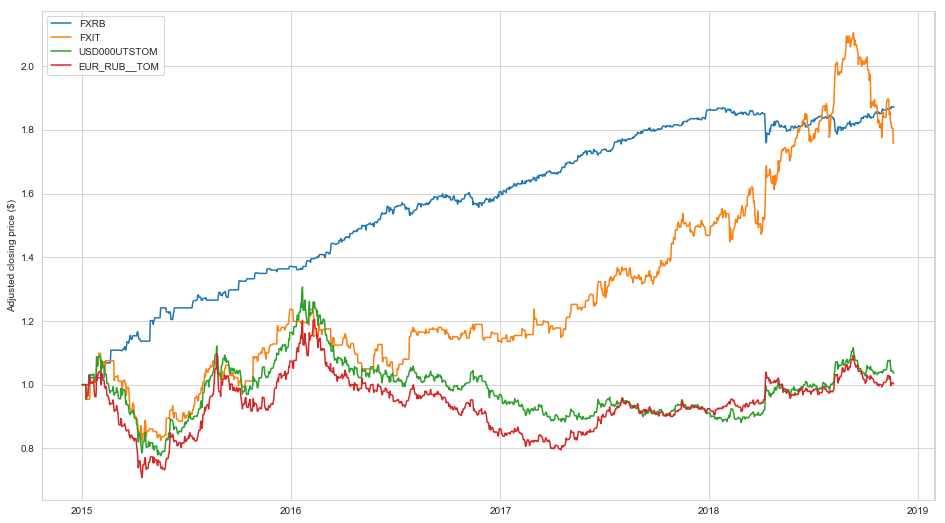

In [152]:
plot_adjusted_price(tickers_price[["FXRB", "FXIT", "USD000UTSTOM", "EUR_RUB__TOM",]])

In [148]:
returns = tickers_price.loc[end_dates, :].reset_index(drop=True) / tickers_price.loc[start_dates, :].reset_index(drop=True)
returns.index = end_dates
returns

FXGD      FXMM      FXAU      FXRB      FXIT  MOEX  PLZL  \
2018-11-01  1.080229  1.055352  1.054729  1.025550  1.271702   NaN   NaN   
2018-05-01  1.140472  1.069345  1.128076  1.076689  1.373048   NaN   NaN   
2017-11-01  0.904145  1.082853  1.056568  1.138126  1.247539   NaN   NaN   
2017-05-01  0.849750  1.084009  0.992486  1.139273  1.133949   NaN   NaN   
2016-11-01  1.100760  1.092566  1.142960  1.181298  1.075236   NaN   NaN   
2016-05-01  1.378596  1.110991  1.153069  1.240343  1.240688   NaN   NaN   

            MTSS  LSNGP  USD000UTSTOM  EUR_RUB__TOM  yndx  
2018-11-01   NaN    NaN      1.127466      1.106621   NaN  
2018-05-01   NaN    NaN      1.106197      1.226144   NaN  
2017-11-01   NaN    NaN      0.920562      0.967714   NaN  
2017-05-01   NaN    NaN      0.880744      0.838174   NaN  
2016-11-01   NaN    NaN      0.990025      0.994799   NaN  
2016-05-01   NaN    NaN      1.250339      1.277737   NaN

In [7]:
returns.describe()

FXGD      FXMM      FXAU      FXRB      FXIT      MOEX      PLZL  \
count  6.000000  6.000000  6.000000  6.000000  6.000000  6.000000  6.000000   
mean   1.082305  1.082519  1.171759  1.132626  1.009366  1.092283  1.405820   
std    0.611378  0.019108  0.504163  0.075856  0.272396  0.202478  0.862564   
min    0.459836  1.055352  0.553731  1.025550  0.640364  0.753021  0.861400   
25%    0.645613  1.072722  1.038265  1.088349  0.789474  1.046098  0.911160   
50%    0.977759  1.083431  1.105915  1.141936  1.122375  1.084210  1.010328   
75%    1.309137  1.090427  1.140558  1.167113  1.198163  1.216418  1.444091   
max    2.123984  1.110991  2.097174  1.240343  1.269148  1.338377  3.086084   

           MTSS     LSNGP  USD000UTSTOM  EUR_RUB__TOM      yndx  
count  6.000000  6.000000      6.000000      6.000000  6.000000  
mean   1.062334  2.311455      1.045983      0.967391  1.279214  
std    0.127514  1.183219      0.138883      0.228260  0.200435  
min    0.909448  1.103531      0.883490      0.612998  1.003766  
25%    0.982835  1.441828      0.938191      0.874080  1.190587  
50%    1.075605  1.958114      1.047444      0.979430  1.261809  
75%    1.083476  3.189454      1.122776      1.078668  1.350096  
max    1.275332  3.979339      1.247857      1.281779  1.601528

FXGD      FXMM      FXAU      FXRB      FXIT      MOEX  \
FXGD          1.000000 -0.588320  0.346875 -0.541877  0.456677 -0.133190   
FXMM         -0.588320  1.000000 -0.124702  0.983984 -0.094774  0.683877   
FXAU          0.346875 -0.124702  1.000000 -0.129133  0.266347 -0.013215   
FXRB         -0.541877  0.983984 -0.129133  1.000000 -0.086560  0.756832   
FXIT          0.456677 -0.094774  0.266347 -0.086560  1.000000  0.094881   
MOEX         -0.133190  0.683877 -0.013215  0.756832  0.094881  1.000000   
PLZL         -0.180150  0.780710 -0.026839  0.848834  0.097156  0.894861   
MTSS         -0.597231  0.673506 -0.185667  0.673354 -0.385453  0.489917   
LSNGP        -0.695261  0.936514 -0.171999  0.892035 -0.232669  0.552981   
USD000UTSTOM  0.320069 -0.052369  0.147561 -0.084925  0.275150 -0.016813   
EUR_RUB__TOM  0.082638  0.143163  0.036578  0.114885  0.075693  0.047565   
yndx         -0.657636  0.912682 -0.159189  0.881219 -0.254063  0.546841   

                  PLZL      MTSS     LSNGP  USD000UTSTOM  EUR_RUB__TOM  \
FXGD         -0.180150 -0.597231 -0.695261      0.320069      0.082638   
FXMM          0.780710  0.673506  0.936514     -0.052369      0.143163   
FXAU         -0.026839 -0.185667 -0.171999      0.147561      0.036578   
FXRB          0.848834  0.673354  0.892035     -0.084925      0.114885   
FXIT          0.097156 -0.385453 -0.232669      0.275150      0.075693   
MOEX          0.894861  0.489917  0.552981     -0.016813      0.047565   
PLZL          1.000000  0.468661  0.582055      0.077634      0.157900   
MTSS          0.468661  1.000000  0.738639     -0.348315     -0.097521   
LSNGP         0.582055  0.738639  1.000000     -0.152148      0.080584   
USD000UTSTOM  0.077634 -0.348315 -0.152148      1.000000      0.721690   
EUR_RUB__TOM  0.157900 -0.097521  0.080584      0.721690      1.000000   
yndx          0.603778  0.740338  0.945674     -0.129113      0.137978   

                  yndx  
FXGD         -0.657636  
FXMM          0.912682  
FXAU         -0.159189  
FXRB          0.881219  
FXIT         -0.254063  
MOEX          0.546841  
PLZL          0.603778  
MTSS          0.740338  
LSNGP         0.945674  
USD000UTSTOM -0.129113  
EUR_RUB__TOM  0.137978  
yndx          1.000000

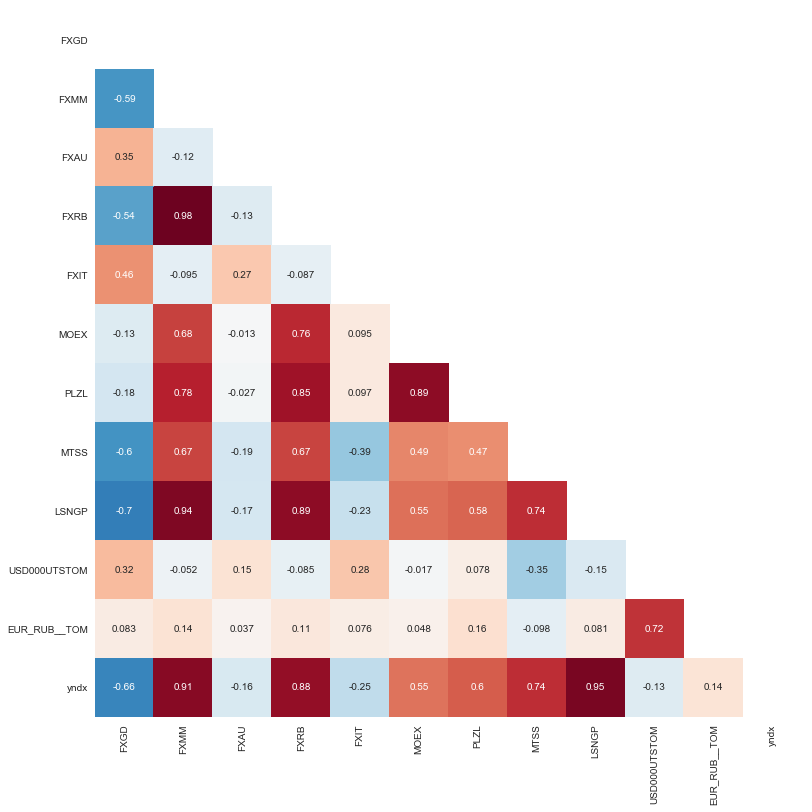

In [27]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(13, 13))
ax = sns.heatmap(tickers_price.corr(), mask=mask, square=True, annot=corr, vmin=-1, vmax=1, cmap='RdBu_r', cbar=False)